In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

from collections import Counter

In [2]:
ROOT_FOLDER = '../../../'

In [3]:
DATA_FOLDER = '../../../data/'

In [4]:
IMAGE_FOLDER = f'{ROOT_FOLDER}articles/img/'

In [5]:
ml_term_classification_df = pd.read_csv(f'{ROOT_FOLDER}ml_term_classification.csv')

In [6]:
ml_term_classification_df

,ml_term,classification,ml_model_category,ml_method_category
0,Linear Regression,ML Model,Classical Linear & Generalized Linear Models,NaN
1,Polynomial Regression,ML Model,Classical Linear & Generalized Linear Models,NaN
2,Ridge Regression,ML Model,Classical Linear & Generalized Linear Models,NaN
3,Lasso Regression,ML Model,Classical Linear & Generalized Linear Models,NaN
4,Elastic Net Regression,ML Model,Classical Linear & Generalized Linear Models,NaN
...,...,...,...,...
86,Contrastive Language-Image Pretraining,ML Method,NaN,Self-Supervised Learning
87,DALL-E,ML Model,Large Pretrained & Specialized Models,NaN
88,Q-Learning,ML Method,NaN,Reinforcement Learning
89,Deep Q-Networks,ML Model,Reinforcement Learning Models,NaN


In [7]:
large_ml_lncRNA_search_df = pd.read_parquet(f'{DATA_FOLDER}large_ml_lncRNA_search_df.parquet')

In [8]:
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df.dropna()
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df.query('language == "en"')
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df[['title', 'year']]

In [9]:
large_ml_lncRNA_search_df

,title,year
12,LncMachine: a machine learning algorithm for l...,2021
29,DMFLDA: a deep learning framework for predicti...,2020
48,Evaluation of deep learning in non-coding RNA ...,2019
58,A review of machine learning-based prediction ...,2023
89,LncRNA Subcellular Localization Signals–Are th...,2023
...,...,...
913,Mitochondrial Import of Malat1 Regulates Cardi...,2020
917,Impact of sequencing technologies on long non-...,2022
921,Deciphering the methylation landscape in breas...,2021
928,Machine learning models for predicting lymph n...,2020


In [10]:
meta_df = large_ml_lncRNA_search_df

In [11]:
ml_results_df = pd.read_parquet(f'{DATA_FOLDER}ml_lncRNA_search_result_df.parquet')

In [12]:
total_no_papers = ml_results_df['title'].nunique()

In [13]:
total_no_papers

76

In [14]:
ml_results_df

,title,ml_term,cnt
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1
...,...,...,...
496,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16
497,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62
498,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1
499,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1


In [15]:
# Merge ML results with publication years
ml_results_df = ml_results_df.merge(meta_df, on="title")

In [16]:
ml_results_df

,title,ml_term,cnt,year
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,2021
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,2021
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,2021
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,2021
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1,2021
...,...,...,...,...
496,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,2017
497,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,2017
498,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,2017
499,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1,2017


In [17]:
year_paper_count_df = ml_results_df.groupby(['year'])['title'].nunique().reset_index()
year_paper_count_df.columns = ['year', 'paper_count']

In [18]:
year_paper_count_df

,year,paper_count
0,2016,1
1,2017,1
2,2018,1
3,2019,7
4,2020,9
5,2021,13
6,2022,10
7,2023,15
8,2024,19


In [19]:
year_paper_count_df.to_csv('year_paper_count_df', index=False)

In [20]:
ml_term_paper_count_df = ml_results_df['ml_term'].value_counts().reset_index()
ml_term_paper_count_df.columns = ['ml_term', 'paper_count']

ml_term_paper_count_df['paper_pct'] = (ml_term_paper_count_df['paper_count'] / total_no_papers) * 100

In [21]:
ml_term_paper_count_df.head()

,ml_term,paper_count,paper_pct
0,SUPPORT_VECTOR_MACHINES,60,78.947368
1,RANDOM_FORESTS,56,73.684211
2,NEURAL_NETWORKS,44,57.894737
3,LOGISTIC_REGRESSION,30,39.473684
4,DECISION_TREES,27,35.526316


In [22]:
ml_term_year_paper_count_df = ml_results_df[['year', 'ml_term']].value_counts().reset_index()
ml_term_year_paper_count_df.columns = ['year', 'ml_term', 'paper_count']

In [23]:
ml_term_year_paper_count_df.head()

,year,ml_term,paper_count
0,2024,SUPPORT_VECTOR_MACHINES,14
1,2024,RANDOM_FORESTS,14
2,2021,SUPPORT_VECTOR_MACHINES,13
3,2021,RANDOM_FORESTS,12
4,2023,RANDOM_FORESTS,12


Add percentage of papers using the term

In [24]:
ml_term_paper_count_df['paper_pct'] = (ml_term_paper_count_df['paper_count'] / total_no_papers) * 100

In [25]:
ml_term_paper_count_df

,ml_term,paper_count,paper_pct
0,SUPPORT_VECTOR_MACHINES,60,78.947368
1,RANDOM_FORESTS,56,73.684211
2,NEURAL_NETWORKS,44,57.894737
3,LOGISTIC_REGRESSION,30,39.473684
4,DECISION_TREES,27,35.526316
5,RECURRENT_NEURAL_NETWORKS,23,30.263158
6,PRINCIPAL_COMPONENT_ANALYSIS,19,25.000000
7,GRADIENT_BOOSTING,18,23.684211
8,BOOSTING,16,21.052632
9,XGBOOST,15,19.736842


Show plots for the top 20 ML terms based on number of papers they have been mentioned in

In [26]:
# Select the top 20 ML term paper counts
top_20_ml_term_paper_count_df = ml_term_paper_count_df.head(20)

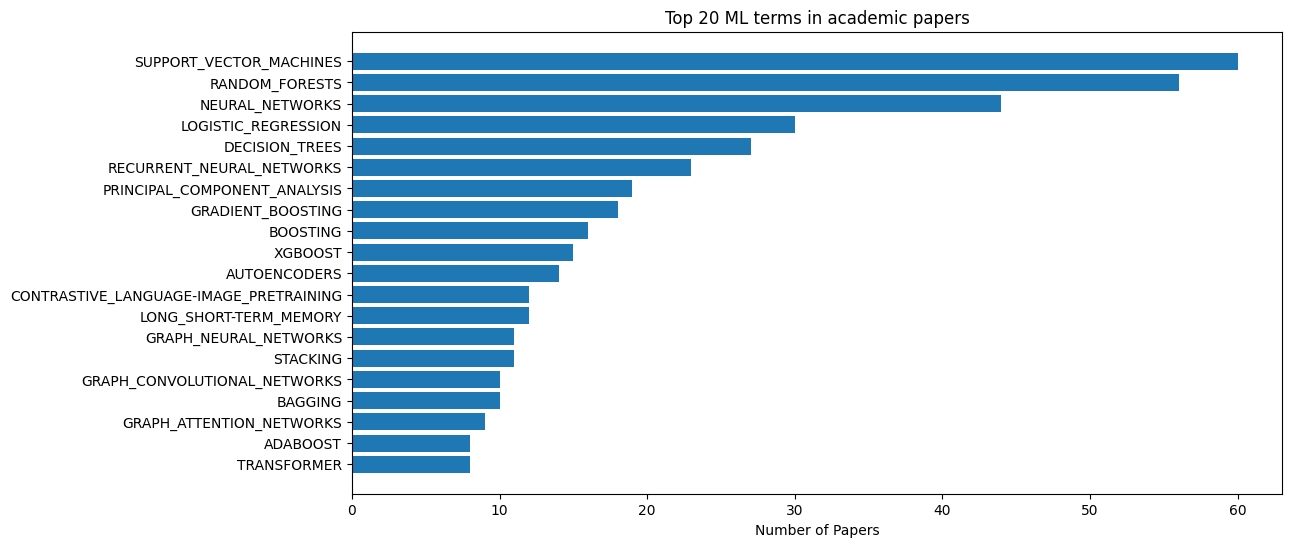

In [27]:
# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_20_ml_term_paper_count_df['ml_term'], top_20_ml_term_paper_count_df['paper_count'])
plt.xlabel("Number of Papers")
# plt.ylabel("ML Term")
plt.title("Top 20 ML terms in academic papers")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


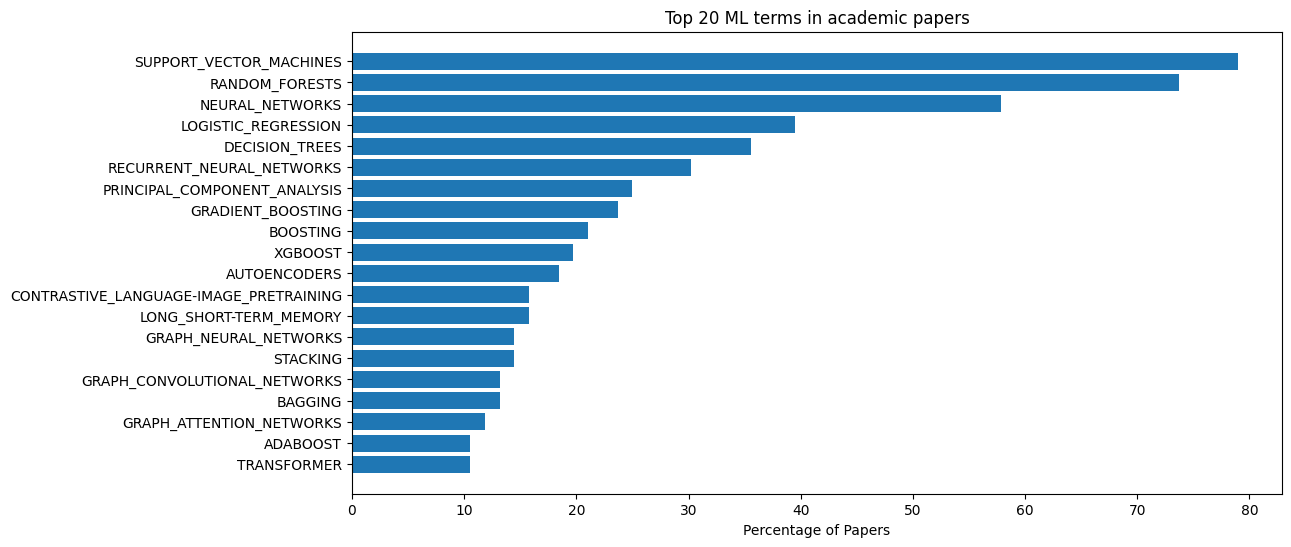

In [28]:
# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_20_ml_term_paper_count_df['ml_term'], top_20_ml_term_paper_count_df['paper_pct'])
plt.xlabel("Percentage of Papers")
# plt.ylabel("ML Term")
plt.title("Top 20 ML terms in academic papers")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_term_paper_pct.png", transparent=True, dpi=300, bbox_inches="tight")

plt.show()

Trend Analysis

In [29]:
ml_results_df

,title,ml_term,cnt,year
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,2021
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,2021
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,2021
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,2021
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1,2021
...,...,...,...,...
496,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,2017
497,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,2017
498,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,2017
499,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1,2017


In [30]:
ml_year_term_paper_count_df = ml_results_df[['year', 'ml_term']].value_counts().reset_index()
ml_year_term_paper_count_df.columns = ['year', 'ml_term', 'paper_count']

In [31]:
ml_year_term_paper_count_df

,year,ml_term,paper_count
0,2024,SUPPORT_VECTOR_MACHINES,14
1,2024,RANDOM_FORESTS,14
2,2021,SUPPORT_VECTOR_MACHINES,13
3,2021,RANDOM_FORESTS,12
4,2023,RANDOM_FORESTS,12
...,...,...,...
183,2024,LLAMA,1
184,2024,MULTI_LAYER_PERCEPTRON,1
185,2024,HIDDEN_MARKOV_MODELS,1
186,2024,RESNET,1


In [32]:
# Pivot for visualization
ml_trend_pivot_df = ml_year_term_paper_count_df.pivot(index="year", columns="ml_term", values="paper_count").fillna(0)

In [33]:
ml_trend_pivot_df

ml_term,ADABOOST,AUTOENCODERS,BAGGING,BAYESIAN_NETWORKS,BIDIRECTIONAL_ENCODER_REPRESENTATIONS_FROM_TRANSFORMERS,BIDIRECTIONAL_GATED_RECURRENT_UNIT,BIDIRECTIONAL_RNNS,BLENDING,BOOSTING,CATBOOST,...,RESNET,RIDGE_REGRESSION,SPECTRAL_CLUSTERING,STACKING,SUPPORT_VECTOR_MACHINES,SUPPORT_VECTOR_REGRESSION,TRANSFORMER,UNIFORM_MANIFOLD_APPROXIMATION_AND_PROJECTION,VARIATIONAL_AUTOENCODERS,XGBOOST
year,,,,,,,,,,,,,,,,,,,,,
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0
2020,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,1.0,0.0
2021,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,...,1.0,0.0,1.0,2.0,13.0,1.0,1.0,1.0,0.0,6.0
2022,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,7.0,0.0,2.0,0.0,0.0,2.0
2023,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,10.0,0.0,2.0,0.0,2.0,2.0
2024,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,3.0,0.0,2.0,14.0,0.0,3.0,0.0,0.0,5.0


In [34]:
# Calculate total value for each ML term
column_totals = ml_trend_pivot_df.iloc[:, 1:].sum().sort_values(ascending=False)

# Reorder columns based on the total value
# ml_trend_pivot_df = ml_trend_pivot_df[['year'] + list(column_totals.index)]
ml_trend_pivot_df = ml_trend_pivot_df[list(column_totals.index)]

In [35]:
ml_trend_pivot_20_df = ml_trend_pivot_df[ml_trend_pivot_df.columns[:20]]

In [36]:
ml_trend_pivot_20_df

ml_term,SUPPORT_VECTOR_MACHINES,RANDOM_FORESTS,NEURAL_NETWORKS,LOGISTIC_REGRESSION,DECISION_TREES,RECURRENT_NEURAL_NETWORKS,PRINCIPAL_COMPONENT_ANALYSIS,GRADIENT_BOOSTING,BOOSTING,XGBOOST,AUTOENCODERS,CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING,LONG_SHORT-TERM_MEMORY,STACKING,GRAPH_NEURAL_NETWORKS,GRAPH_CONVOLUTIONAL_NETWORKS,BAGGING,GRAPH_ATTENTION_NETWORKS,NAIVE_BAYES,HIDDEN_MARKOV_MODELS
year,,,,,,,,,,,,,,,,,,,,
2016,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2019,6.0,5.0,7.0,3.0,1.0,4.0,1.0,1.0,2.0,0.0,2.0,1.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0
2020,7.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0
2021,13.0,12.0,8.0,9.0,8.0,6.0,3.0,5.0,6.0,6.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
2022,7.0,6.0,7.0,5.0,3.0,6.0,2.0,2.0,1.0,2.0,3.0,1.0,4.0,2.0,3.0,0.0,3.0,0.0,1.0,0.0
2023,10.0,12.0,8.0,5.0,6.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,0.0,1.0,3.0,2.0
2024,14.0,14.0,8.0,6.0,5.0,1.0,6.0,6.0,3.0,5.0,3.0,5.0,0.0,2.0,3.0,5.0,0.0,5.0,0.0,1.0


In [37]:
year_paper_count_df

,year,paper_count
0,2016,1
1,2017,1
2,2018,1
3,2019,7
4,2020,9
5,2021,13
6,2022,10
7,2023,15
8,2024,19


In [38]:
ml_trend_pivot_20_df.index

Index(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], dtype='object', name='year')

Calculate the percentage of papers each term is in per year

In [39]:
# Ensure that the 'year' column in df_papers is set as the index so it aligns with df_terms:
year_paper_count_df = year_paper_count_df.set_index('year')

In [40]:
# Now, calculate the percentage for each term in each year:
ml_trend_pivot_20_pct_df = (ml_trend_pivot_20_df.div(year_paper_count_df['paper_count'], axis=0)) * 100

In [41]:
# This will give you a new dataframe where each cell shows the percentage of papers in that year mentioning the term.
ml_trend_pivot_20_pct_df

ml_term,SUPPORT_VECTOR_MACHINES,RANDOM_FORESTS,NEURAL_NETWORKS,LOGISTIC_REGRESSION,DECISION_TREES,RECURRENT_NEURAL_NETWORKS,PRINCIPAL_COMPONENT_ANALYSIS,GRADIENT_BOOSTING,BOOSTING,XGBOOST,AUTOENCODERS,CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING,LONG_SHORT-TERM_MEMORY,STACKING,GRAPH_NEURAL_NETWORKS,GRAPH_CONVOLUTIONAL_NETWORKS,BAGGING,GRAPH_ATTENTION_NETWORKS,NAIVE_BAYES,HIDDEN_MARKOV_MODELS
year,,,,,,,,,,,,,,,,,,,,
2016,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
2017,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000
2019,85.714286,71.428571,100.000000,42.857143,14.285714,57.142857,14.285714,14.285714,28.571429,0.000000,28.571429,14.285714,28.571429,28.571429,14.285714,0.000000,28.571429,14.285714,14.285714,14.285714
2020,77.777778,44.444444,55.555556,11.111111,22.222222,22.222222,22.222222,11.111111,11.111111,0.000000,11.111111,11.111111,22.222222,11.111111,0.000000,0.000000,22.222222,11.111111,0.000000,11.111111
2021,100.000000,92.307692,61.538462,69.230769,61.538462,46.153846,23.076923,38.461538,46.153846,46.153846,15.384615,15.384615,15.384615,15.384615,7.692308,15.384615,15.384615,7.692308,15.384615,15.384615
2022,70.000000,60.000000,70.000000,50.000000,30.000000,60.000000,20.000000,20.000000,10.000000,20.000000,30.000000,10.000000,40.000000,20.000000,30.000000,0.000000,30.000000,0.000000,10.000000,0.000000
2023,66.666667,80.000000,53.333333,33.333333,40.000000,26.666667,26.666667,20.000000,13.333333,13.333333,13.333333,6.666667,13.333333,6.666667,20.000000,20.000000,0.000000,6.666667,20.000000,13.333333
2024,73.684211,73.684211,42.105263,31.578947,26.315789,5.263158,31.578947,31.578947,15.789474,26.315789,15.789474,26.315789,0.000000,10.526316,15.789474,26.315789,0.000000,26.315789,0.000000,5.263158


<Figure size 1200x600 with 0 Axes>

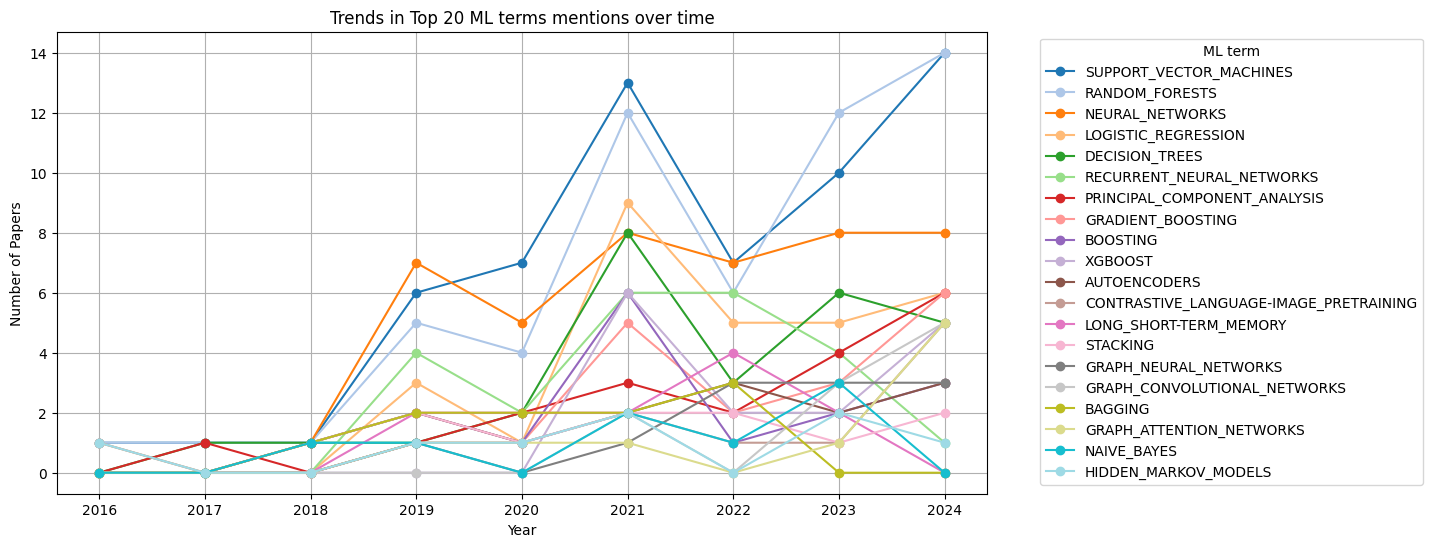

In [42]:
# Define colormap using the correct method
num_terms = len(ml_trend_pivot_20_df.columns)
colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
colors = [colormap(i / num_terms) for i in range(num_terms)]  # Generate distinct colors

# Plot time-series trends
plt.figure(figsize=(12, 6))
ml_trend_pivot_20_df.plot(kind="line", figsize=(12, 6), marker="o", color=colors)
plt.title("Trends in Top 20 ML terms mentions over time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.legend(title="ML term", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_terms_trend.png", transparent=True, dpi=300, bbox_inches="tight")

plt.show()


<Figure size 1200x600 with 0 Axes>

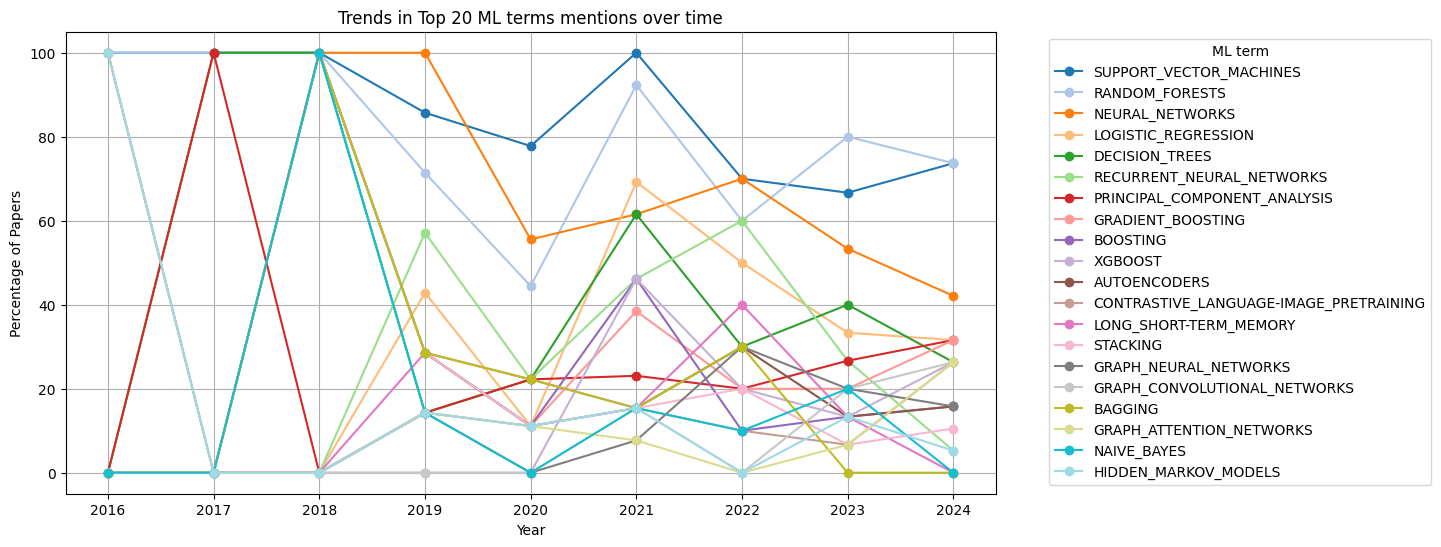

In [43]:
# Define colormap using the correct method
num_terms = len(ml_trend_pivot_20_pct_df.columns)
colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
colors = [colormap(i / num_terms) for i in range(num_terms)]  # Generate distinct colors

# Plot time-series trends
plt.figure(figsize=(12, 6))
ml_trend_pivot_20_pct_df.plot(kind="line", figsize=(12, 6), marker="o", color=colors)
plt.title("Trends in Top 20 ML terms mentions over time")
plt.xlabel("Year")
plt.ylabel("Percentage of Papers")
plt.legend(title="ML term", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Saving the figure.
#plt.savefig(f"{IMAGE_FOLDER}top_20_ml_terms_trend.png", transparent=True, dpi=300, bbox_inches="tight")

plt.show()


Well our resultset doesn't have enough papers until 2019. This is because the default search of google scholar returning the most popular papers first

Let's restrict the papers to 2020-2024

<Figure size 1200x600 with 0 Axes>

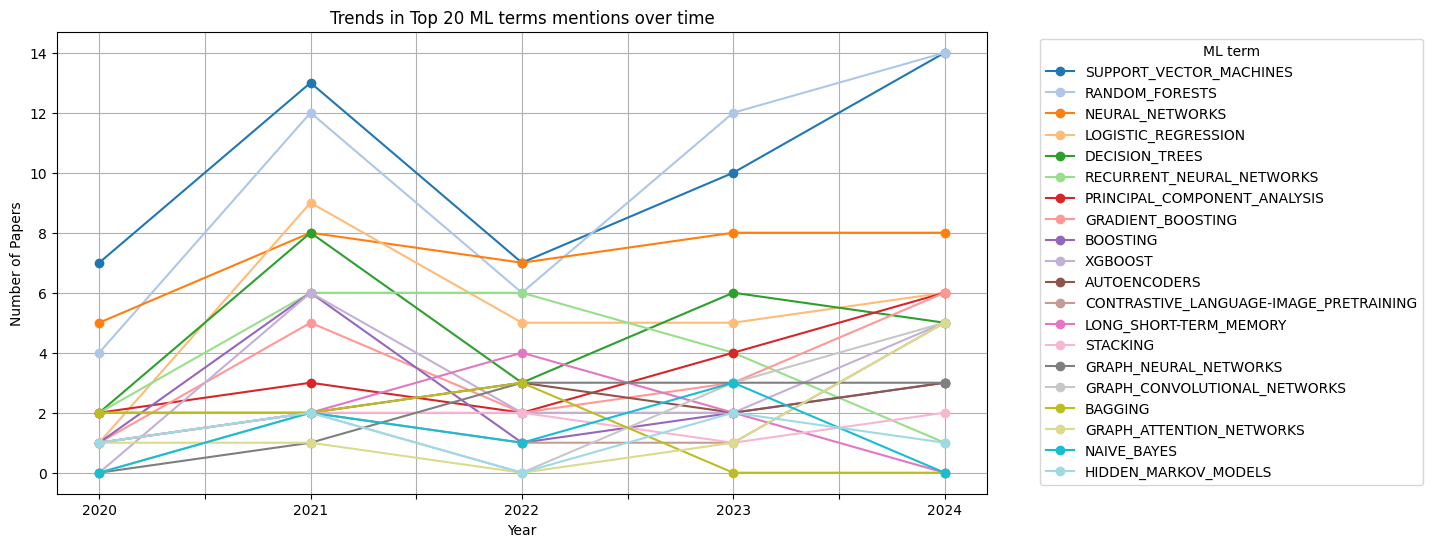

In [44]:
# Define colormap using the correct method
num_terms = len(ml_trend_pivot_20_df.columns)
colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
colors = [colormap(i / num_terms) for i in range(num_terms)]  # Generate distinct colors

# Plot time-series trends
plt.figure(figsize=(12, 6))
ml_trend_pivot_20_df.query('year > "2019"').plot(kind="line", figsize=(12, 6), marker="o", color=colors)
plt.title("Trends in Top 20 ML terms mentions over time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.legend(title="ML term", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_terms_trend.png", transparent=True, dpi=300, bbox_inches="tight")

plt.show()

<Figure size 1200x600 with 0 Axes>

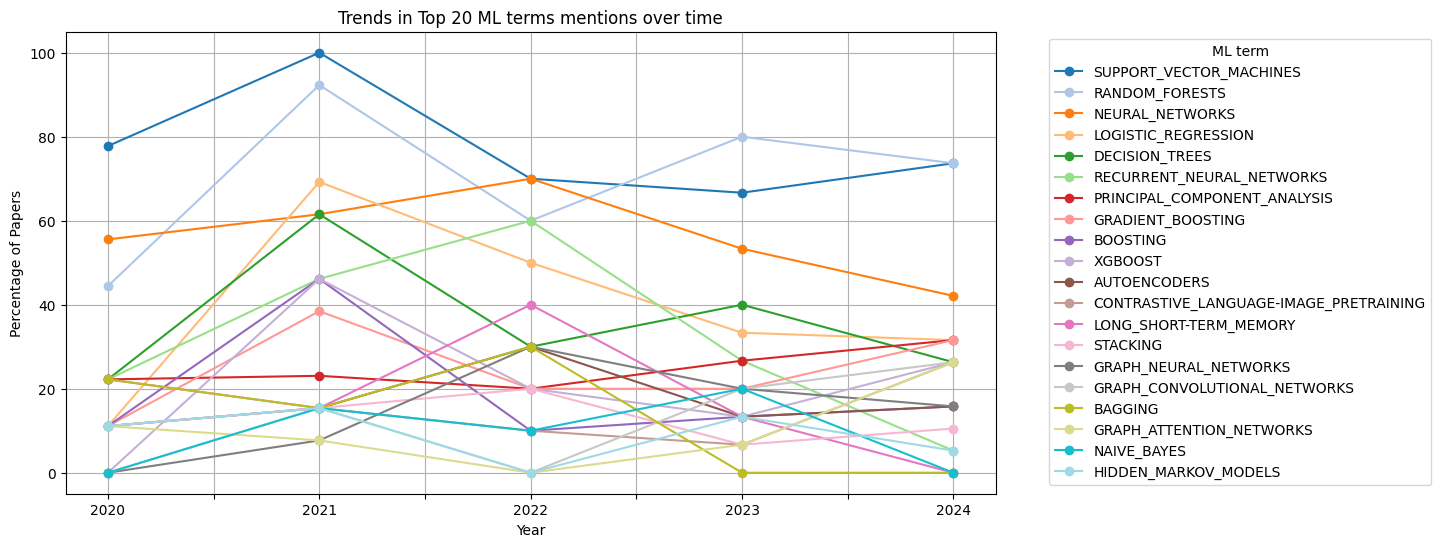

In [45]:
# Define colormap using the correct method
num_terms = len(ml_trend_pivot_20_df.columns)
colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
colors = [colormap(i / num_terms) for i in range(num_terms)]  # Generate distinct colors

# Plot time-series trends
plt.figure(figsize=(12, 6))
ml_trend_pivot_20_pct_df.query('year > "2019"').plot(kind="line", figsize=(12, 6), marker="o", color=colors)
plt.title("Trends in Top 20 ML terms mentions over time")
plt.xlabel("Year")
plt.ylabel("Percentage of Papers")
plt.legend(title="ML term", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_terms_trend.png", transparent=True, dpi=300, bbox_inches="tight")

plt.show()

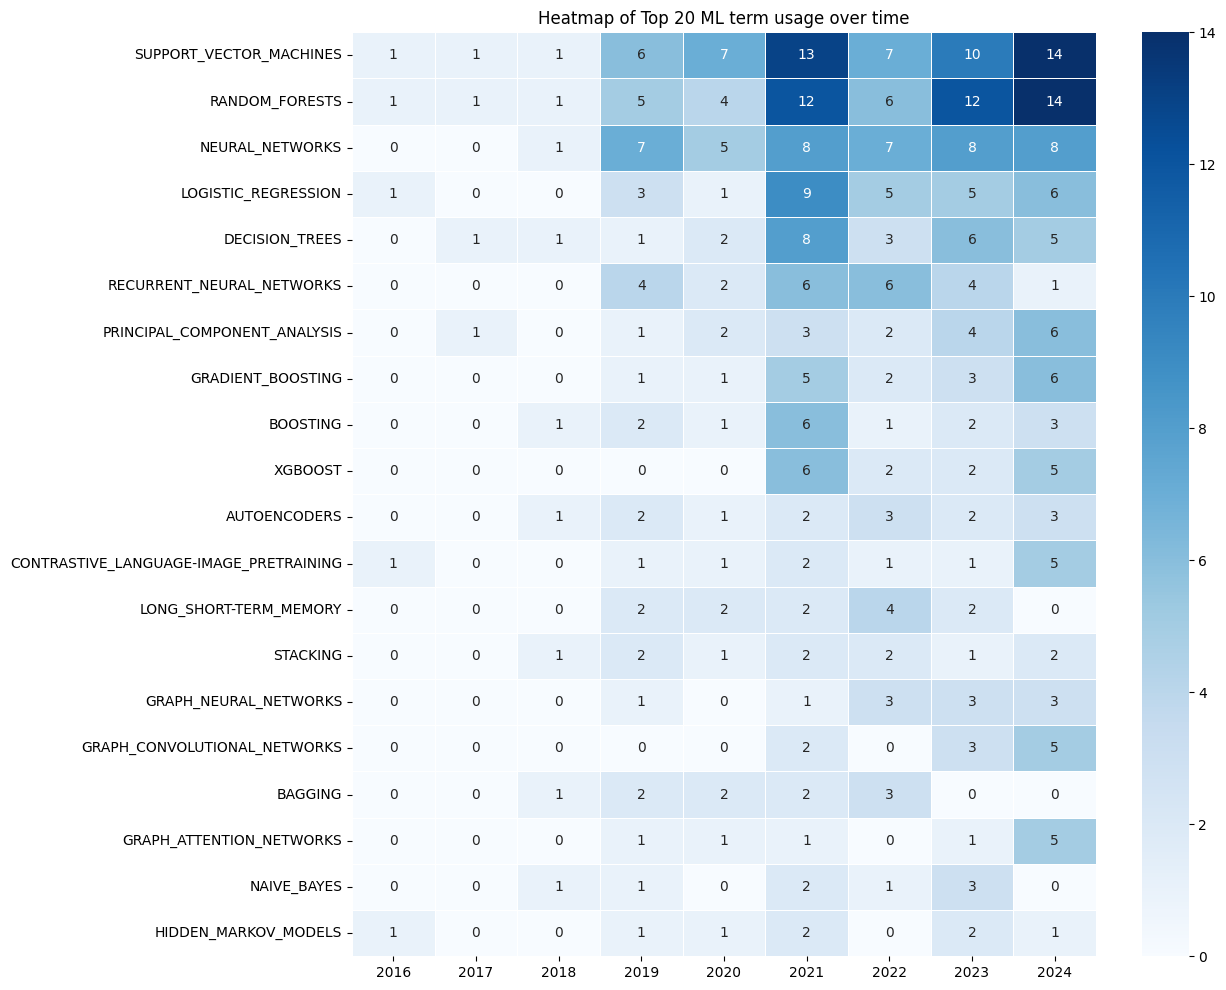

In [46]:
import seaborn as sns

# Create a heatmap for the selected ML terms
plt.figure(figsize=(12, 12))
sns.heatmap(ml_trend_pivot_20_df.T, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
#sns.heatmap(ml_trend_pivot.T, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

#plt.xlabel("Year")
plt.xlabel("")
#plt.ylabel("Machine Learning Term")
plt.ylabel("")
plt.title("Heatmap of Top 20 ML term usage over time")
plt.show()


Co-occurrence Analysis – Generate a network graph to explore relationships between ML term and research topics.

In [47]:
ml_term_paper_count_df

,ml_term,paper_count,paper_pct
0,SUPPORT_VECTOR_MACHINES,60,78.947368
1,RANDOM_FORESTS,56,73.684211
2,NEURAL_NETWORKS,44,57.894737
3,LOGISTIC_REGRESSION,30,39.473684
4,DECISION_TREES,27,35.526316
5,RECURRENT_NEURAL_NETWORKS,23,30.263158
6,PRINCIPAL_COMPONENT_ANALYSIS,19,25.000000
7,GRADIENT_BOOSTING,18,23.684211
8,BOOSTING,16,21.052632
9,XGBOOST,15,19.736842


In [48]:
from collections import Counter
import numpy as np

# Group ml_terms by title
grouped_terms = ml_results_df.groupby('title')['ml_term'].apply(list)

# Get unique ml methods
unique_terms = sorted(ml_results_df['ml_term'].unique())

# Create an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(
    np.zeros((len(unique_terms), len(unique_terms)), dtype=int),
    index=unique_terms,
    columns=unique_terms
)

# Populate the matrix
for terms in grouped_terms:
    term_counts = Counter(terms)
    for term1 in term_counts:
        for term2 in term_counts:
            if term1 != term2:
                co_occurrence_matrix.loc[term1, term2] += 1

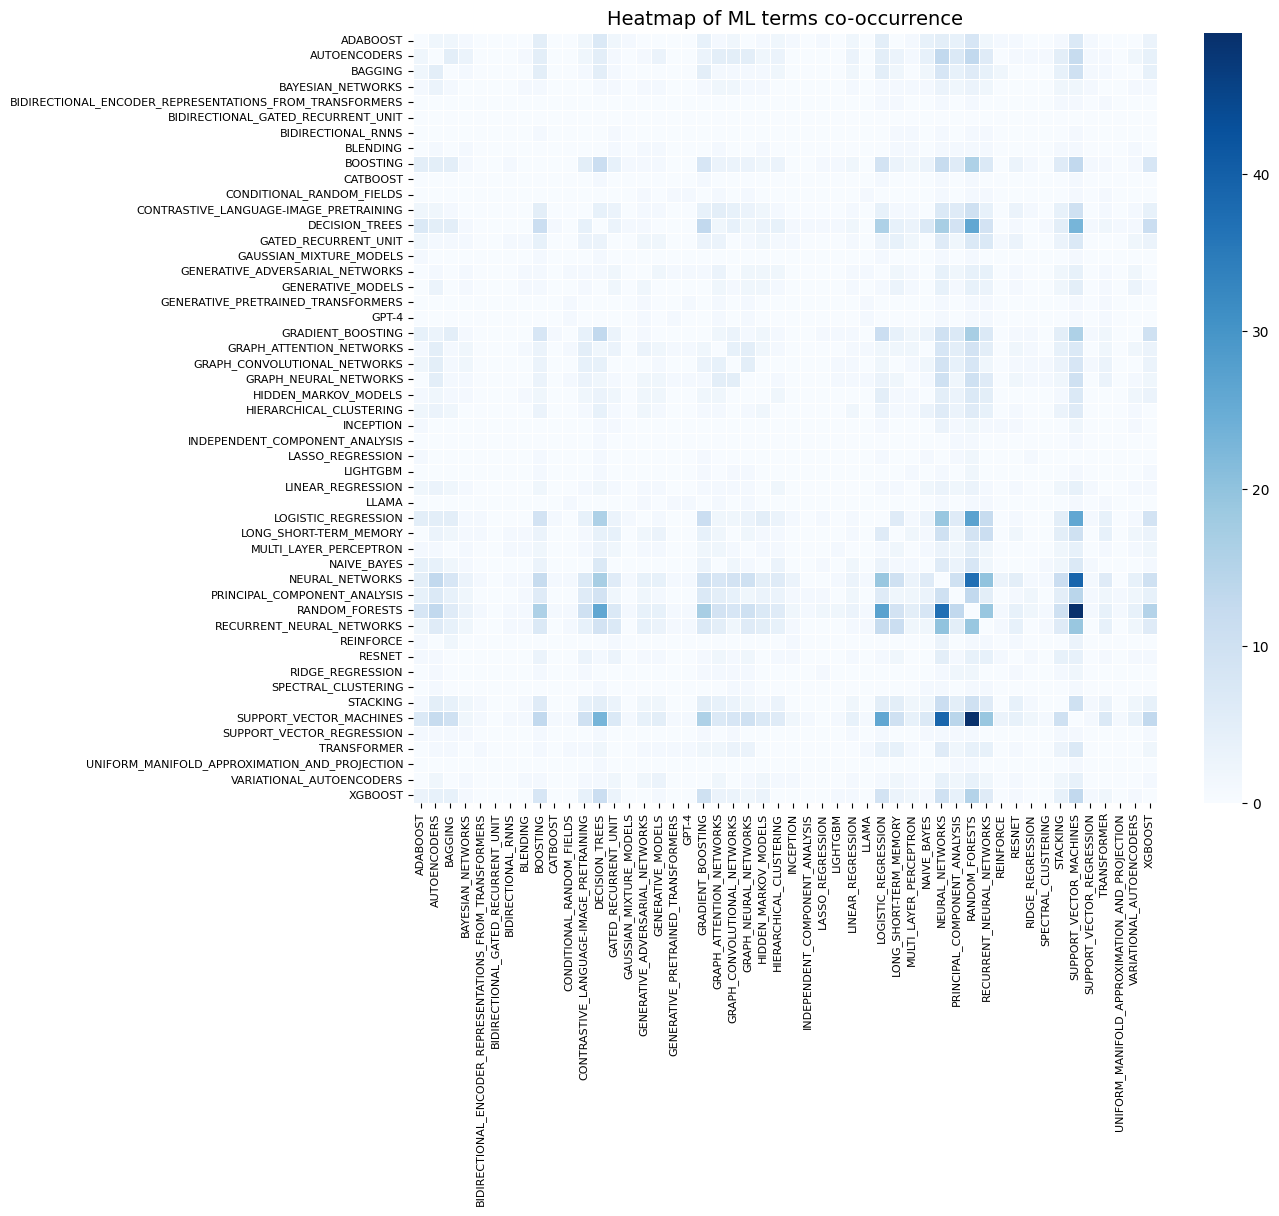

In [49]:
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 10))

# Use seaborn's heatmap to visualize the co-occurrence matrix
sns.heatmap(co_occurrence_matrix, cmap="Blues", annot=False, linewidths=0.5)

# Labels and title
plt.title("Heatmap of ML terms co-occurrence", fontsize=14)
#plt.xlabel("ML Methods", fontsize=12)
#plt.ylabel("ML Methods", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Saving the figure.
plt.savefig(f"{IMAGE_FOLDER}top_20_ml_terms_co-occurrence.png", transparent=True)

# Show the plot
plt.show()


# Add hierarchy to the ML Terms by splitting them into ML Models and ML Methods

change the format of the ml_term to be in the same format as the ml_results_df

In [50]:
ml_term_classification_df['ml_term'] = ml_term_classification_df['ml_term'].apply(lambda x: x.replace(' ', '_').upper())

In [51]:
ml_results_df

,title,ml_term,cnt,year
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,2021
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,2021
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,2021
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,2021
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1,2021
...,...,...,...,...
496,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,2017
497,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,2017
498,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,2017
499,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1,2017


In [52]:
#ml_results_df.merge(ml_term_classification_df, left_on='ml_term', right_on='ml_term', how='inner')
ml_results_df = ml_results_df.merge(ml_term_classification_df, left_on='ml_term', right_on='ml_term', how='inner')

In [53]:
ml_results_df

,title,ml_term,cnt,year,classification,ml_model_category,ml_method_category
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,2021,ML Model,Tree-Based Ensemble Methods,NaN
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,2021,ML Model,Support Vector Methods,NaN
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,2021,ML Model,Classical Linear & Generalized Linear Models,NaN
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,2021,ML Model,Tree-Based Ensemble Methods,NaN
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1,2021,ML Model,Tree-Based Ensemble Methods,NaN
...,...,...,...,...,...,...,...
482,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,2017,ML Model,Tree-Based Ensemble Methods,NaN
483,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,2017,ML Model,Support Vector Methods,NaN
484,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,2017,ML Method,NaN,Unsupervised Learning
485,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1,2017,ML Model,Tree-Based Ensemble Methods,NaN


In [54]:
ml_results_df.groupby(['title', 'ml_term']).count()

cnt  \
title                                              ml_term                                       
A Machine Learning Framework for Identifying Mo... ADABOOST                                  1   
                                                   AUTOENCODERS                              1   
                                                   DECISION_TREES                            1   
                                                   HIERARCHICAL_CLUSTERING                   1   
                                                   LINEAR_REGRESSION                         1   
...                                                                                        ...   
… and Exploration of Immune Activation Pathways... PRINCIPAL_COMPONENT_ANALYSIS              1   
                                                   SUPPORT_VECTOR_MACHINES                   1   
… synthesis-associated pivotal biomarkers ident... CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING    1   
                                                   RANDOM_FORESTS                            1   
                                                   SUPPORT_VECTOR_MACHINES                   1   

                                                                                           year  \
title                                              ml_term                                        
A Machine Learning Framework for Identifying Mo... ADABOOST                                   1   
                                                   AUTOENCODERS                               1   
                                                   DECISION_TREES                             1   
                                                   HIERARCHICAL_CLUSTERING                    1   
                                                   LINEAR_REGRESSION                          1   
...                                                                                         ...   
… and Exploration of Immune Activation Pathways... PRINCIPAL_COMPONENT_ANALYSIS               1   
                                                   SUPPORT_VECTOR_MACHINES                    1   
… synthesis-associated pivotal biomarkers ident... CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING     1   
                                                   RANDOM_FORESTS                             1   
                                                   SUPPORT_VECTOR_MACHINES                    1   

                                                                                           classification  \
title                                              ml_term                                                  
A Machine Learning Framework for Identifying Mo... ADABOOST                                             1   
                                                   AUTOENCODERS                                         1   
                                                   DECISION_TREES                                       1   
                                                   HIERARCHICAL_CLUSTERING                              1   
                                                   LINEAR_REGRESSION                                    1   
...                                                                                                   ...   
… and Exploration of Immune Activation Pathways... PRINCIPAL_COMPONENT_ANALYSIS                         1   
                                                   SUPPORT_VECTOR_MACHINES                              1   
… synthesis-associated pivotal biomarkers ident... CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING               1   
                                                   RANDOM_FORESTS                                       1   
                                                   SUPPORT_VECTOR_MACHINES                              1   

                                                                                           ml_model_category  

In [55]:
ml_results_df.to_csv('ml_results_df.csv', index=False)

### ML Methods

In [56]:
ml_method_results_df = ml_results_df.query('classification == "ML Method"').drop(columns=['classification', 'ml_model_category'])

In [57]:
ml_method_results_df

,title,ml_term,cnt,year,ml_method_category
8,DMFLDA: a deep learning framework for predicti...,BAGGING,2,2020,Supervised Learning
17,Evaluation of deep learning in non-coding RNA ...,GENERATIVE_MODELS,1,2019,Unsupervised Learning
37,SDLDA: lncRNA-disease association prediction b...,BAGGING,2,2020,Supervised Learning
39,SDLDA: lncRNA-disease association prediction b...,REINFORCE,2,2020,Reinforcement Learning
41,A systematic evaluation of the computational t...,CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING,1,2021,Self-Supervised Learning
...,...,...,...,...,...
467,Mitochondrial Import of Malat1 Regulates Cardi...,PRINCIPAL_COMPONENT_ANALYSIS,1,2020,Unsupervised Learning
473,Deciphering the methylation landscape in breas...,PRINCIPAL_COMPONENT_ANALYSIS,13,2021,Unsupervised Learning
474,Deciphering the methylation landscape in breas...,UNIFORM_MANIFOLD_APPROXIMATION_AND_PROJECTION,3,2021,Unsupervised Learning
484,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,2017,Unsupervised Learning


Plot frequency analysis

In [58]:
def plot_most_mentioned(df, title, xlabel):
    plt.figure(figsize=(12, 6))
    df.head(20).plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency (Count)")
    plt.xticks(rotation=45)
    plt.show()

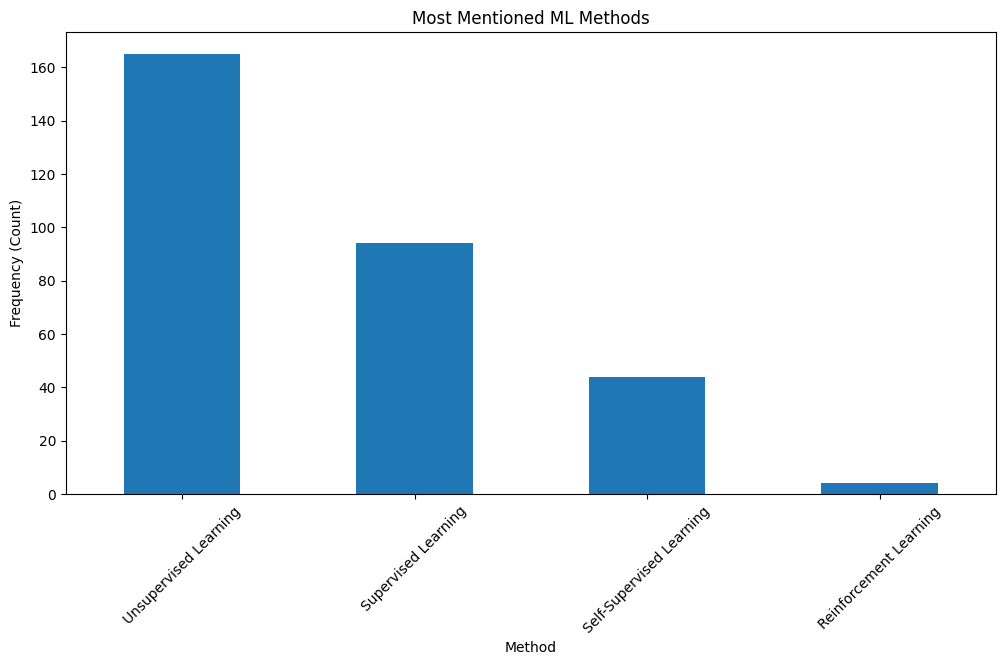

In [59]:
# Aggregate the counts of ML terms
ml_method_counts = ml_method_results_df.groupby("ml_method_category")["cnt"].sum().sort_values(ascending=False)

plot_most_mentioned(df=ml_method_counts, title='Most Mentioned ML Methods', xlabel='Method')

In [60]:
def count_distinct_titles_by_category(df, category, total_no_papers):
    # Count distinct Titles grouped by Category
    ml_category_counts_df = df.groupby(category)['title'].nunique().reset_index()
    ml_category_counts_df.columns = [category, "paper_count"]
    ml_category_counts_df.sort_values(['paper_count'], ascending=False, inplace=True)
    ml_category_counts_df['paper_pct'] = (ml_category_counts_df['paper_count'] / total_no_papers) * 100
    return ml_category_counts_df
    

In [61]:
# Count distinct Titles grouped by Category
ml_category_counts_df = count_distinct_titles_by_category(df=ml_method_results_df, category='ml_method_category', total_no_papers=total_no_papers)

In [62]:
ml_category_counts_df

,ml_method_category,paper_count,paper_pct
3,Unsupervised Learning,27,35.526316
2,Supervised Learning,17,22.368421
1,Self-Supervised Learning,12,15.789474
0,Reinforcement Learning,3,3.947368


In [63]:
def plot_category_vs_papers(df, category, papers, title, xlabel):
    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.barh(df[category], df[papers])
    plt.xlabel(xlabel)
    # plt.ylabel("ML Term")
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

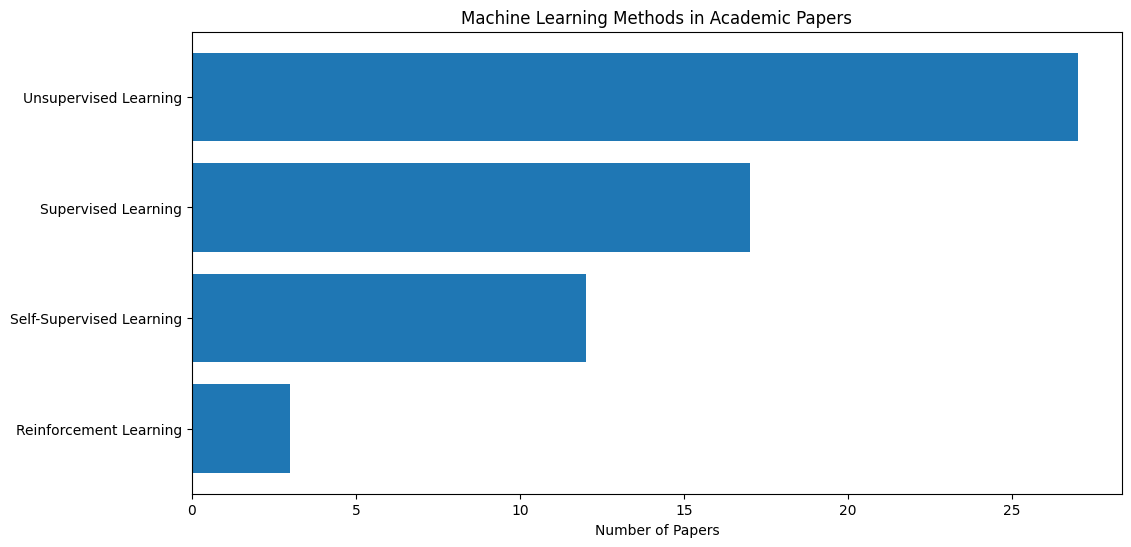

In [64]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_method_category',
                        papers='paper_count',
                        title='Machine Learning Methods in Academic Papers',
                        xlabel='Number of Papers'
                       )


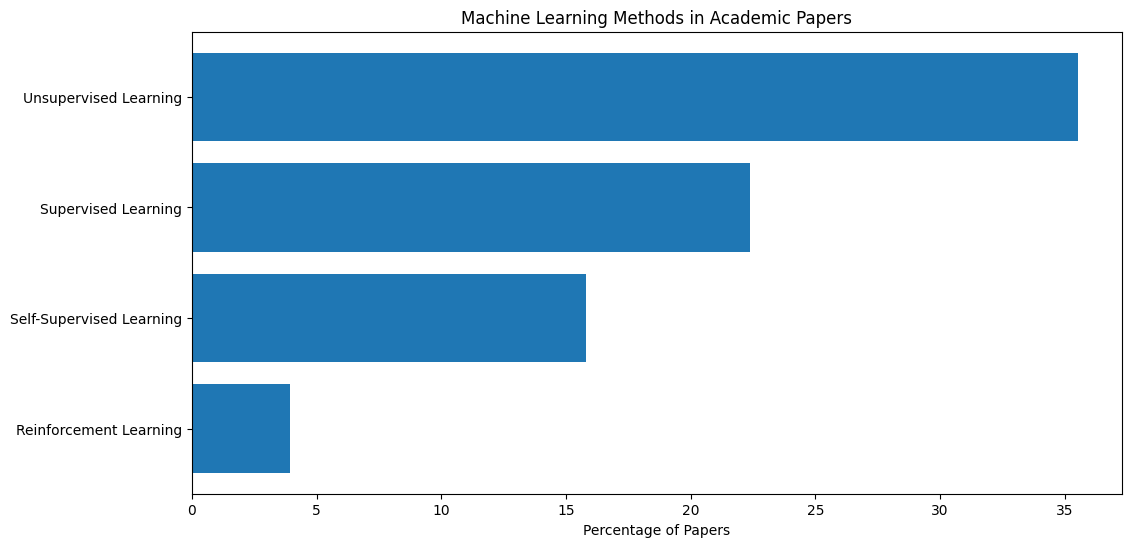

In [65]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_method_category',
                        papers='paper_pct',
                        title='Machine Learning Methods in Academic Papers',
                        xlabel='Percentage of Papers'
                       )

Trend analysis

In [66]:
ml_year_term_paper_count_df

,year,ml_term,paper_count
0,2024,SUPPORT_VECTOR_MACHINES,14
1,2024,RANDOM_FORESTS,14
2,2021,SUPPORT_VECTOR_MACHINES,13
3,2021,RANDOM_FORESTS,12
4,2023,RANDOM_FORESTS,12
...,...,...,...
183,2024,LLAMA,1
184,2024,MULTI_LAYER_PERCEPTRON,1
185,2024,HIDDEN_MARKOV_MODELS,1
186,2024,RESNET,1


In [67]:
ml_year_method_count_df = ml_method_results_df[['year', 'ml_method_category']].value_counts().reset_index()

# Pivot for visualization
ml_trend_pivot_df = ml_year_method_count_df.pivot(index='year', columns='ml_method_category', values='count').fillna(0)

In [68]:
ml_trend_pivot_df

ml_method_category,Reinforcement Learning,Self-Supervised Learning,Supervised Learning,Unsupervised Learning
year,,,,
2016,0.0,1.0,0.0,0.0
2017,0.0,0.0,0.0,2.0
2018,0.0,0.0,2.0,1.0
2019,1.0,1.0,4.0,6.0
2020,1.0,1.0,4.0,3.0
2021,0.0,2.0,4.0,5.0
2022,0.0,1.0,5.0,3.0
2023,1.0,1.0,1.0,8.0
2024,0.0,5.0,2.0,6.0


In [69]:
# Calculate total value for each ML Category
column_totals = ml_trend_pivot_df.iloc[:, :].sum().sort_values(ascending=False)

# Reorder columns based on the total value
ml_trend_pivot_df = ml_trend_pivot_df[list(column_totals.index)]

In [70]:
column_totals

ml_method_category
Unsupervised Learning       34.0
Supervised Learning         22.0
Self-Supervised Learning    12.0
Reinforcement Learning       3.0
dtype: float64

In [71]:
ml_trend_pivot_df

ml_method_category,Unsupervised Learning,Supervised Learning,Self-Supervised Learning,Reinforcement Learning
year,,,,
2016,0.0,0.0,1.0,0.0
2017,2.0,0.0,0.0,0.0
2018,1.0,2.0,0.0,0.0
2019,6.0,4.0,1.0,1.0
2020,3.0,4.0,1.0,1.0
2021,5.0,4.0,2.0,0.0
2022,3.0,5.0,1.0,0.0
2023,8.0,1.0,1.0,1.0
2024,6.0,2.0,5.0,0.0


In [72]:
ml_trend_pivot_df.to_csv('ml_trend_pivot_df.csv', index=False)

In [73]:
def plot_category_over_time(df, title, legend_title, file_name):
    # Define colormap using the correct method
    num_categories = len(ml_trend_pivot_df.columns)
    colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
    colors = [colormap(i / num_categories) for i in range(num_categories)]  # Generate distinct colors
    
    # Plot time-series trends with improved colors
    plt.figure(figsize=(12, 6))
    ax = ml_trend_pivot_df.plot(kind="line", figsize=(12, 6), marker="o", color=colors)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Frequency (Count)')
    # Make the legend transparent, adjust alpha between 0 (fully transparent) and 1 (opaque)
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.0)
    plt.grid(True)    

    # Saving the figure.
    plt.savefig(f'{IMAGE_FOLDER}{file_name}', transparent=True, dpi=300, bbox_inches='tight')
    
    plt.show()

<Figure size 1200x600 with 0 Axes>

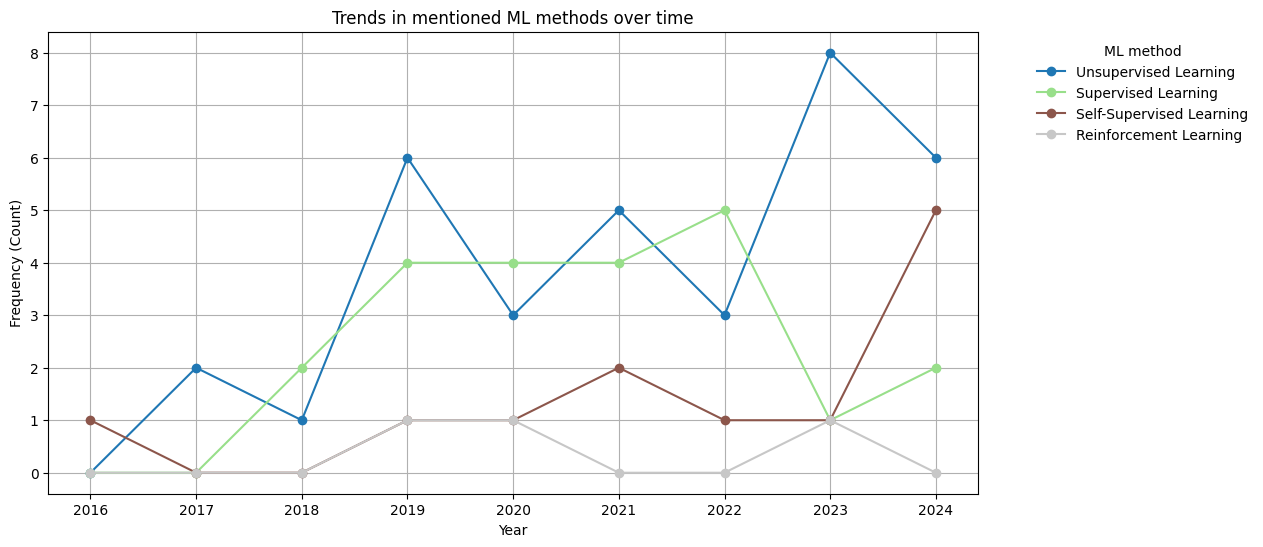

In [74]:
plot_category_over_time(df=ml_trend_pivot_df,
                        title='Trends in mentioned ML methods over time',
                        legend_title='ML method',
                        file_name='top_20_ml_method_trend.png'
                       )

Co-occurrence Analysis – Generate a network graph to explore relationships between ML Methods and research topics.

In [75]:
def generate_co_occurrence_matrix(df, category):
    # Group categories by title
    #grouped_categories = df.dropna(subset=[category]).groupby('title')[category].apply(list)
    grouped_categories = df.groupby('title')[category].apply(list)
    
    # Get unique categories
    #unique_categories = sorted(df.dropna(subset=[category])[category].unique())
    unique_categories = sorted(df[category].unique())
    
    # Create an empty co-occurrence matrix
    co_occurrence_matrix_category = pd.DataFrame(
        np.zeros((len(unique_categories), len(unique_categories)), dtype=int),
        index=unique_categories,
        columns=unique_categories
    )
    
    # Populate the matrix
    for categories in grouped_categories:
        category_counts = Counter(categories)
        for cat1 in category_counts:
            for cat2 in category_counts:
                if cat1 != cat2:
                    co_occurrence_matrix_category.loc[cat1, cat2] += 1
    return co_occurrence_matrix_category, unique_categories

In [76]:
def plot_co_occurrence_matrix(matrix, title):
    # Set up the figure
    plt.figure(figsize=(12, 10))
    
    # Use seaborn's heatmap to visualize the co-occurrence matrix
    sns.heatmap(matrix, cmap="Blues", annot=False, linewidths=0.5)
    
    # Labels and title
    plt.title(title, fontsize=14)
    #plt.xlabel("ML Categories", fontsize=12)
    #plt.ylabel("ML Categories", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    
    # Show the plot
    plt.show()

In [77]:
co_occurrence_matrix_category, unique_categories = generate_co_occurrence_matrix(df=ml_method_results_df, category='ml_method_category')

In [78]:
co_occurrence_matrix_category

,Reinforcement Learning,Self-Supervised Learning,Supervised Learning,Unsupervised Learning
Reinforcement Learning,0,0,2,0
Self-Supervised Learning,0,0,5,7
Supervised Learning,2,5,0,9
Unsupervised Learning,0,7,9,0


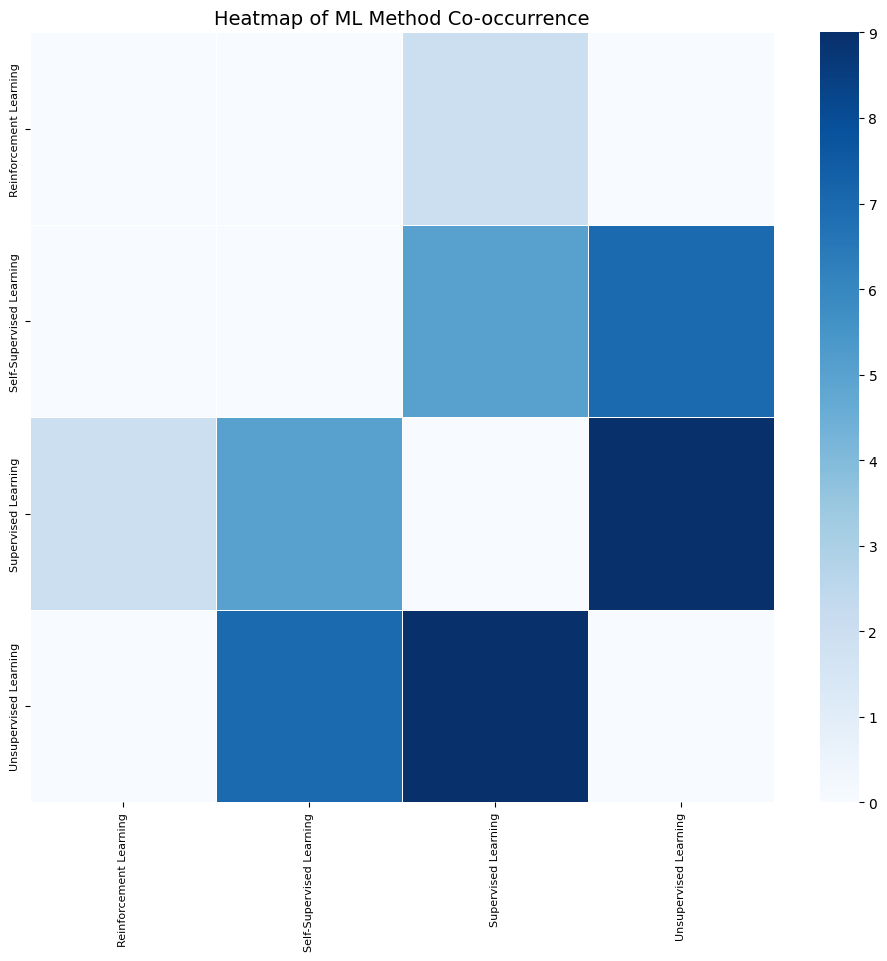

In [79]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_category, title='Heatmap of ML Method Co-occurrence')

Perform GAP analysis on this data

In [80]:
# Identify low co-occurrence category pairs (potential gaps)
low_threshold = 2  # Define threshold for underexplored category pairs
underexplored_category_pairs = np.where(
    (co_occurrence_matrix_category > 0) & (co_occurrence_matrix_category <= low_threshold)
)

# Create a DataFrame with underexplored category pairs
underexplored_category_df = pd.DataFrame({
    "Category 1": [unique_categories[i] for i in underexplored_category_pairs[0]],
    "Category 2": [unique_categories[j] for j in underexplored_category_pairs[1]],
    "Co-occurrence Frequency": [co_occurrence_matrix_category.iloc[i, j] for i, j in zip(underexplored_category_pairs[0], underexplored_category_pairs[1])]
})

# Display the underexplored co-occurrences
# tools.display_dataframe_to_user(name="Underexplored ML Category Pairs", dataframe=underexplored_category_df)
underexplored_category_df

,Category 1,Category 2,Co-occurrence Frequency
0,Reinforcement Learning,Supervised Learning,2
1,Supervised Learning,Reinforcement Learning,2


Identified underexplored category pairs in ML research, where different categories have co-occurred only once or twice in the dataset. These might represent niche or less commonly explored combinations, offering potential research opportunities.

### ML Models

In [81]:
ml_model_results_df = ml_results_df.query('classification == "ML Model"').drop(columns=['classification', 'ml_method_category'])

In [83]:
ml_model_results_df

,title,ml_term,cnt,year,ml_model_category
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,2021,Tree-Based Ensemble Methods
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,2021,Support Vector Methods
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,2021,Classical Linear & Generalized Linear Models
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,2021,Tree-Based Ensemble Methods
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1,2021,Tree-Based Ensemble Methods
...,...,...,...,...,...
480,Machine learning models for predicting lymph n...,DECISION_TREES,2,2020,Tree-Based Ensemble Methods
481,Machine learning models for predicting lymph n...,NEURAL_NETWORKS,2,2020,Feedforward Neural Networks
482,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,2017,Tree-Based Ensemble Methods
483,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,2017,Support Vector Methods


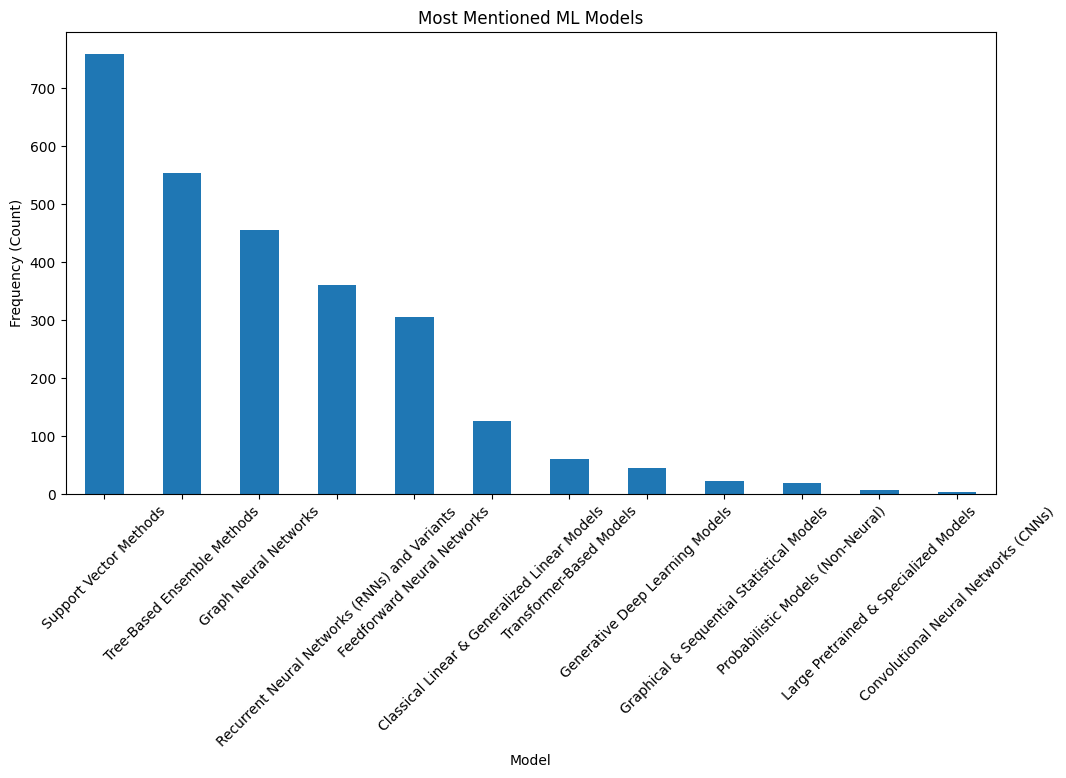

In [84]:
# Aggregate the counts of ML terms
ml_model_counts = ml_model_results_df.groupby('ml_model_category')['cnt'].sum().sort_values(ascending=False)

plot_most_mentioned(df=ml_model_counts, title='Most Mentioned ML Models', xlabel='Model')

In [85]:
# Count distinct Titles grouped by Category
ml_category_counts_df = count_distinct_titles_by_category(df=ml_model_results_df, category='ml_model_category', total_no_papers=total_no_papers)

In [86]:
ml_category_counts_df

,ml_model_category,paper_count,paper_pct
9,Support Vector Methods,60,78.947368
11,Tree-Based Ensemble Methods,58,76.315789
2,Feedforward Neural Networks,47,61.842105
0,Classical Linear & Generalized Linear Models,36,47.368421
8,Recurrent Neural Networks (RNNs) and Variants,25,32.894737
4,Graph Neural Networks,18,23.684211
5,Graphical & Sequential Statistical Models,11,14.473684
7,Probabilistic Models (Non-Neural),9,11.842105
10,Transformer-Based Models,8,10.526316
3,Generative Deep Learning Models,7,9.210526


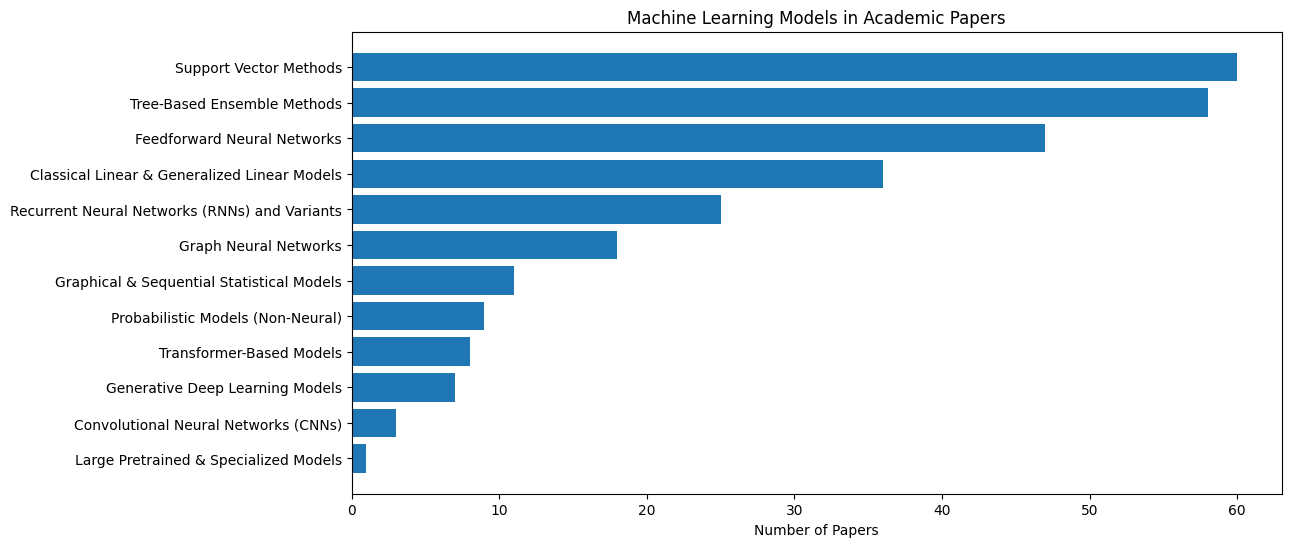

In [87]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_model_category',
                        papers='paper_count',
                        title='Machine Learning Models in Academic Papers',
                        xlabel='Number of Papers'
                       )

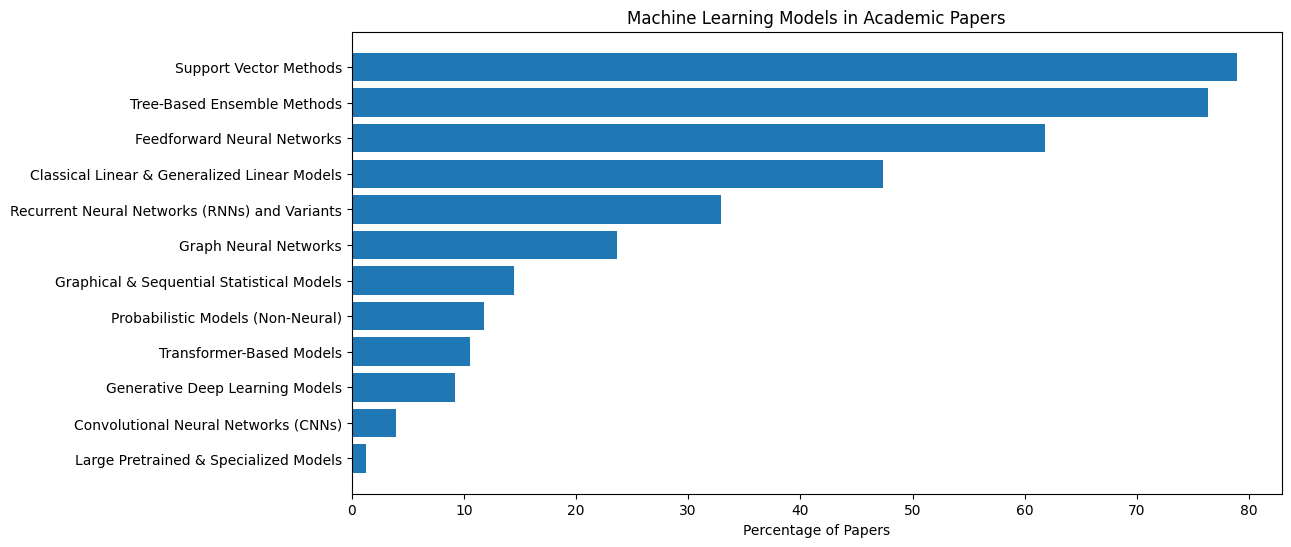

In [88]:
plot_category_vs_papers(df=ml_category_counts_df,
                        category='ml_model_category',
                        papers='paper_pct',
                        title='Machine Learning Models in Academic Papers',
                        xlabel='Percentage of Papers'
                       )

Trend analysis

In [89]:
ml_year_model_count_df = ml_model_results_df[['year', 'ml_model_category']].value_counts().reset_index()

# Pivot for visualization
ml_trend_pivot_df = ml_year_model_count_df.pivot(index='year', columns='ml_model_category', values='count').fillna(0)

In [90]:
ml_trend_pivot_df

ml_model_category,Classical Linear & Generalized Linear Models,Convolutional Neural Networks (CNNs),Feedforward Neural Networks,Generative Deep Learning Models,Graph Neural Networks,Graphical & Sequential Statistical Models,Large Pretrained & Specialized Models,Probabilistic Models (Non-Neural),Recurrent Neural Networks (RNNs) and Variants,Support Vector Methods,Transformer-Based Models,Tree-Based Ensemble Methods
year,,,,,,,,,,,,
2016,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2018,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
2019,4.0,1.0,9.0,2.0,2.0,1.0,0.0,1.0,6.0,6.0,0.0,9.0
2020,1.0,0.0,8.0,2.0,1.0,2.0,0.0,0.0,6.0,7.0,0.0,9.0
2021,10.0,0.0,10.0,0.0,4.0,3.0,0.0,3.0,8.0,14.0,1.0,40.0
2022,7.0,0.0,10.0,0.0,3.0,0.0,0.0,1.0,10.0,7.0,2.0,15.0
2023,6.0,2.0,12.0,3.0,7.0,3.0,0.0,3.0,6.0,10.0,2.0,30.0
2024,10.0,0.0,12.0,2.0,13.0,2.0,2.0,0.0,1.0,14.0,3.0,34.0


In [91]:
# Calculate total value for each ML Category
column_totals = ml_trend_pivot_df.iloc[:, :].sum().sort_values(ascending=False)

# Reorder columns based on the total value
ml_trend_pivot_df = ml_trend_pivot_df[list(column_totals.index)]

In [92]:
column_totals

ml_model_category
Tree-Based Ensemble Methods                      143.0
Feedforward Neural Networks                       63.0
Support Vector Methods                            61.0
Classical Linear & Generalized Linear Models      39.0
Recurrent Neural Networks (RNNs) and Variants     37.0
Graph Neural Networks                             30.0
Graphical & Sequential Statistical Models         12.0
Generative Deep Learning Models                    9.0
Probabilistic Models (Non-Neural)                  9.0
Transformer-Based Models                           8.0
Convolutional Neural Networks (CNNs)               3.0
Large Pretrained & Specialized Models              2.0
dtype: float64

<Figure size 1200x600 with 0 Axes>

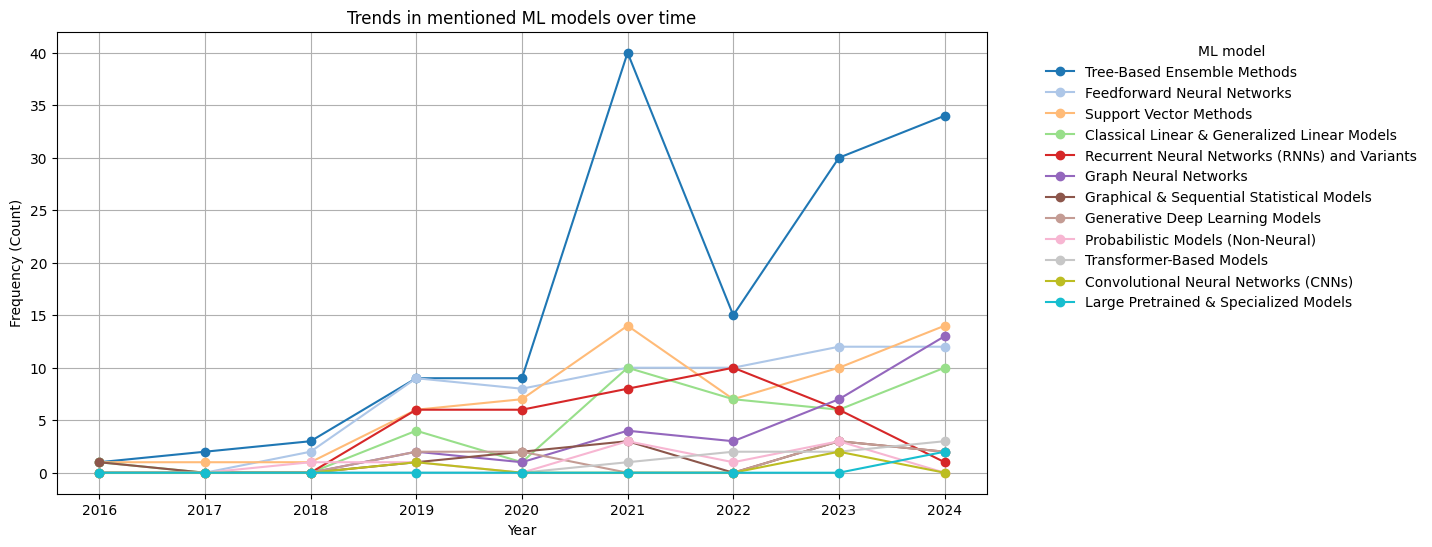

In [93]:
plot_category_over_time(df=ml_trend_pivot_df,
                        title='Trends in mentioned ML models over time',
                        legend_title='ML model',
                        file_name='top_20_ml_model_trend.png'
                       )

Co-occurrence Analysis – Generate a network graph to explore relationships between ML Models and research topics.

In [94]:
ml_model_results_df

,title,ml_term,cnt,year,ml_model_category
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,2021,Tree-Based Ensemble Methods
1,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,2021,Support Vector Methods
2,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,2021,Classical Linear & Generalized Linear Models
3,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,2021,Tree-Based Ensemble Methods
4,LncMachine: a machine learning algorithm for l...,BOOSTING,1,2021,Tree-Based Ensemble Methods
...,...,...,...,...,...
480,Machine learning models for predicting lymph n...,DECISION_TREES,2,2020,Tree-Based Ensemble Methods
481,Machine learning models for predicting lymph n...,NEURAL_NETWORKS,2,2020,Feedforward Neural Networks
482,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,2017,Tree-Based Ensemble Methods
483,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,2017,Support Vector Methods


In [97]:
co_occurrence_matrix_category, unique_categories = generate_co_occurrence_matrix(df=ml_model_results_df, category='ml_model_category')

In [98]:
co_occurrence_matrix_category

,Classical Linear & Generalized Linear Models,Convolutional Neural Networks (CNNs),Feedforward Neural Networks,Generative Deep Learning Models,Graph Neural Networks,Graphical & Sequential Statistical Models,Large Pretrained & Specialized Models,Probabilistic Models (Non-Neural),Recurrent Neural Networks (RNNs) and Variants,Support Vector Methods,Transformer-Based Models,Tree-Based Ensemble Methods
Classical Linear & Generalized Linear Models,0,1,24,2,8,6,0,5,14,31,4,32
Convolutional Neural Networks (CNNs),1,0,3,1,0,0,0,0,1,2,0,2
Feedforward Neural Networks,24,3,0,6,16,8,1,8,21,41,6,39
Generative Deep Learning Models,2,1,6,0,3,4,1,0,4,6,1,6
Graph Neural Networks,8,0,16,3,0,5,1,2,8,16,5,16
Graphical & Sequential Statistical Models,6,0,8,4,5,0,1,1,7,9,1,10
Large Pretrained & Specialized Models,0,0,1,1,1,1,0,0,1,1,1,1
Probabilistic Models (Non-Neural),5,0,8,0,2,1,0,0,2,8,0,9
Recurrent Neural Networks (RNNs) and Variants,14,1,21,4,8,7,1,2,0,20,5,20
Support Vector Methods,31,2,41,6,16,9,1,8,20,0,7,50


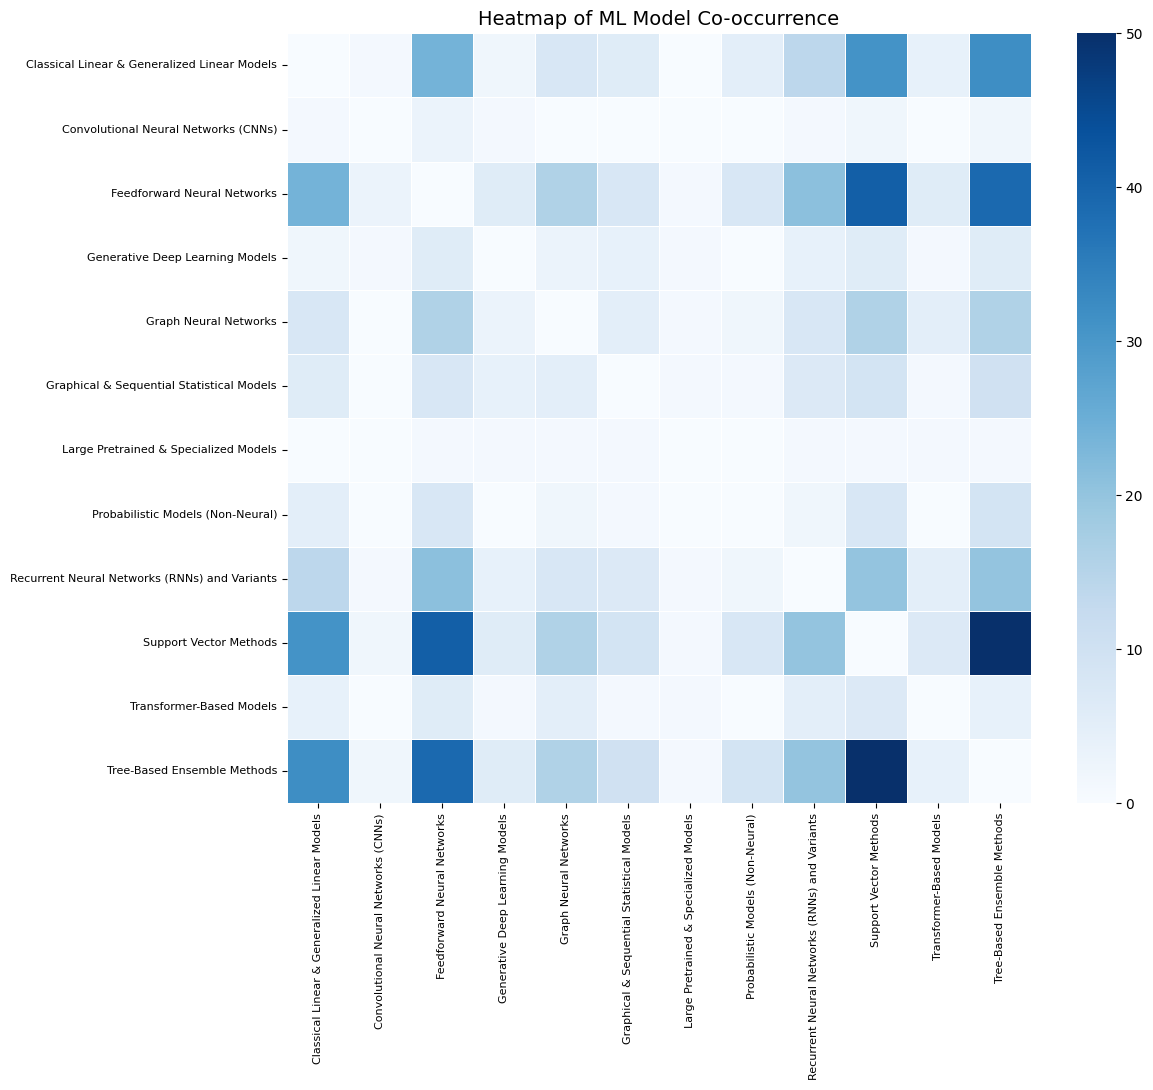

In [99]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_category, title='Heatmap of ML Model Co-occurrence')

Perform GAP analysis on this data

In [100]:
# Identify low co-occurrence category pairs (potential gaps)
low_threshold = 2  # Define threshold for underexplored category pairs
underexplored_category_pairs = np.where(
    (co_occurrence_matrix_category > 0) & (co_occurrence_matrix_category <= low_threshold)
)

# Create a DataFrame with underexplored category pairs
underexplored_category_df = pd.DataFrame({
    "Category 1": [unique_categories[i] for i in underexplored_category_pairs[0]],
    "Category 2": [unique_categories[j] for j in underexplored_category_pairs[1]],
    "Co-occurrence Frequency": [co_occurrence_matrix_category.iloc[i, j] for i, j in zip(underexplored_category_pairs[0], underexplored_category_pairs[1])]
})

# Display the underexplored co-occurrences
# tools.display_dataframe_to_user(name="Underexplored ML Category Pairs", dataframe=underexplored_category_df)
underexplored_category_df

,Category 1,Category 2,Co-occurrence Frequency
0,Classical Linear & Generalized Linear Models,Convolutional Neural Networks (CNNs),1
1,Classical Linear & Generalized Linear Models,Generative Deep Learning Models,2
2,Convolutional Neural Networks (CNNs),Classical Linear & Generalized Linear Models,1
3,Convolutional Neural Networks (CNNs),Generative Deep Learning Models,1
4,Convolutional Neural Networks (CNNs),Recurrent Neural Networks (RNNs) and Variants,1
5,Convolutional Neural Networks (CNNs),Support Vector Methods,2
6,Convolutional Neural Networks (CNNs),Tree-Based Ensemble Methods,2
7,Feedforward Neural Networks,Large Pretrained & Specialized Models,1
8,Generative Deep Learning Models,Classical Linear & Generalized Linear Models,2
9,Generative Deep Learning Models,Convolutional Neural Networks (CNNs),1


Identified underexplored category pairs in ML research, where different categories have co-occurred only once or twice in the dataset. These might represent niche or less commonly explored combinations, offering potential research opportunities.

### Method & Model

In [101]:
df_filtered = ml_results_df.drop(columns=['cnt', 'classification', 'ml_term'])

In [103]:
# Create paper_model_df with distinct values of title and ml_model_category
paper_model_df = df_filtered[['title', 'ml_model_category']].drop_duplicates()

# Create paper_method_df with distinct values of title and ml_method_category
paper_method_df = df_filtered[['title', 'ml_method_category']].drop_duplicates()

In [104]:
# Drop rows with null values in paper_model_df and paper_method_df
paper_model_df = paper_model_df.dropna(subset=['ml_model_category'])
paper_method_df = paper_method_df.dropna(subset=['ml_method_category'])

In [105]:
# Merge the two dataframes on 'title' to associate models with methods in the same paper
merged_df = paper_model_df.merge(paper_method_df, on='title')

# Create a co-occurrence matrix using a cross-tabulation
co_occurrence_matrix_model_method = pd.crosstab(merged_df['ml_model_category'], merged_df['ml_method_category'])

# Create a co-occurrence matrix with methods as rows and models as columns
co_occurrence_matrix_method_model = pd.crosstab(merged_df['ml_method_category'], merged_df['ml_model_category'])

In [108]:
co_occurrence_matrix_model_method

ml_method_category,Reinforcement Learning,Self-Supervised Learning,Supervised Learning,Unsupervised Learning
ml_model_category,,,,
Classical Linear & Generalized Linear Models,0,6,10,13
Convolutional Neural Networks (CNNs),1,0,0,1
Feedforward Neural Networks,3,7,16,17
Generative Deep Learning Models,0,1,2,5
Graph Neural Networks,0,7,7,10
Graphical & Sequential Statistical Models,0,2,3,6
Probabilistic Models (Non-Neural),0,0,2,6
Recurrent Neural Networks (RNNs) and Variants,1,4,9,9
Support Vector Methods,3,10,16,22


In [109]:
co_occurrence_matrix_method_model

ml_model_category,Classical Linear & Generalized Linear Models,Convolutional Neural Networks (CNNs),Feedforward Neural Networks,Generative Deep Learning Models,Graph Neural Networks,Graphical & Sequential Statistical Models,Probabilistic Models (Non-Neural),Recurrent Neural Networks (RNNs) and Variants,Support Vector Methods,Transformer-Based Models,Tree-Based Ensemble Methods
ml_method_category,,,,,,,,,,,
Reinforcement Learning,0,1,3,0,0,0,0,1,3,0,1
Self-Supervised Learning,6,0,7,1,7,2,0,4,10,1,10
Supervised Learning,10,0,16,2,7,3,2,9,16,4,12
Unsupervised Learning,13,1,17,5,10,6,6,9,22,3,21


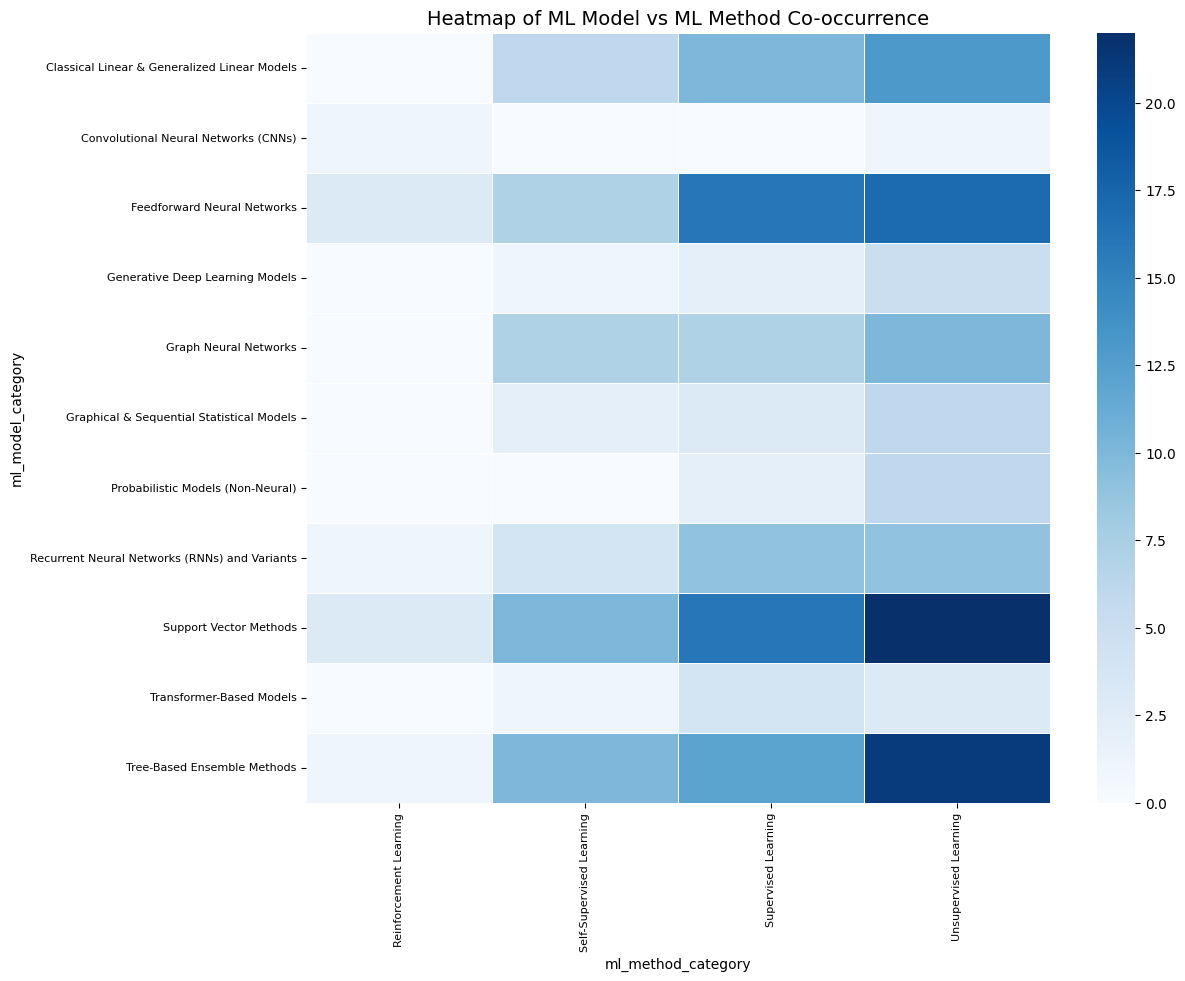

In [110]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_model_method, title='Heatmap of ML Model vs ML Method Co-occurrence')

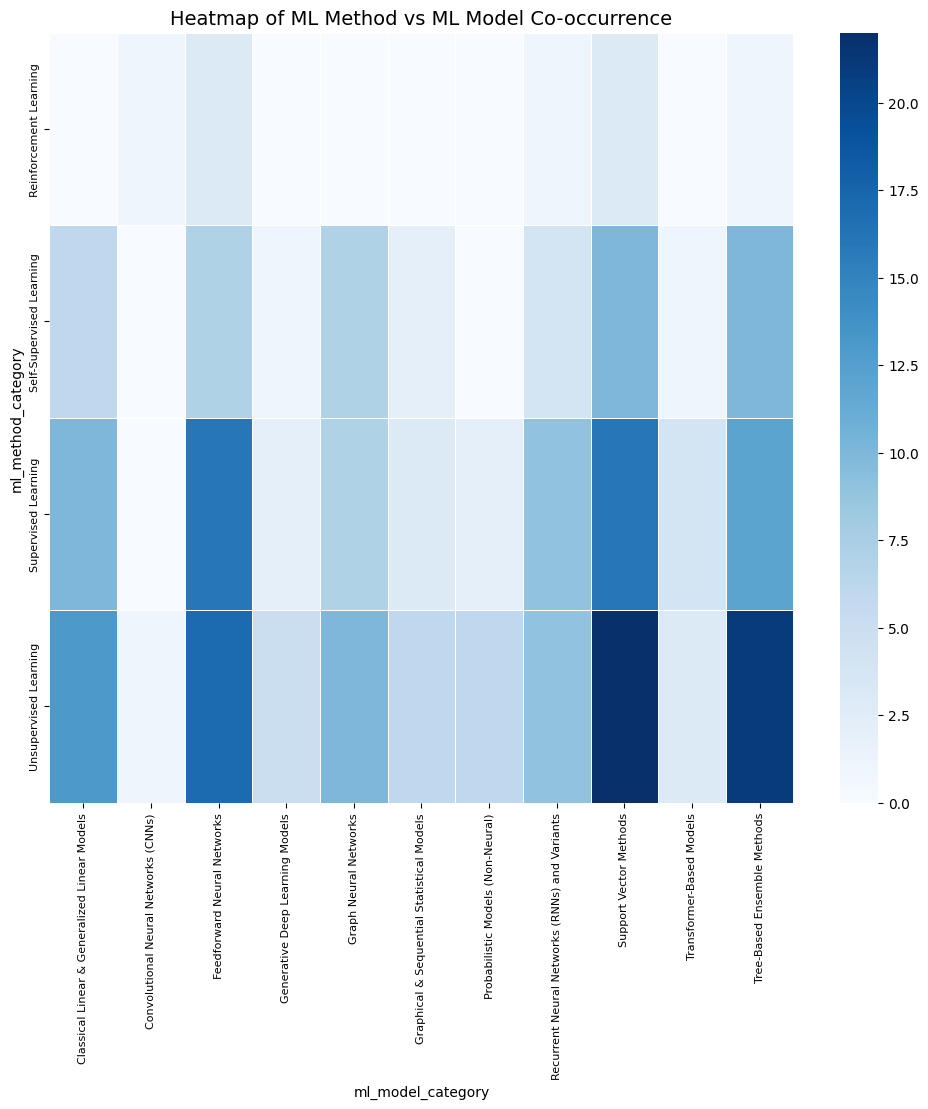

In [111]:
plot_co_occurrence_matrix(matrix=co_occurrence_matrix_method_model, title='Heatmap of ML Method vs ML Model Co-occurrence')

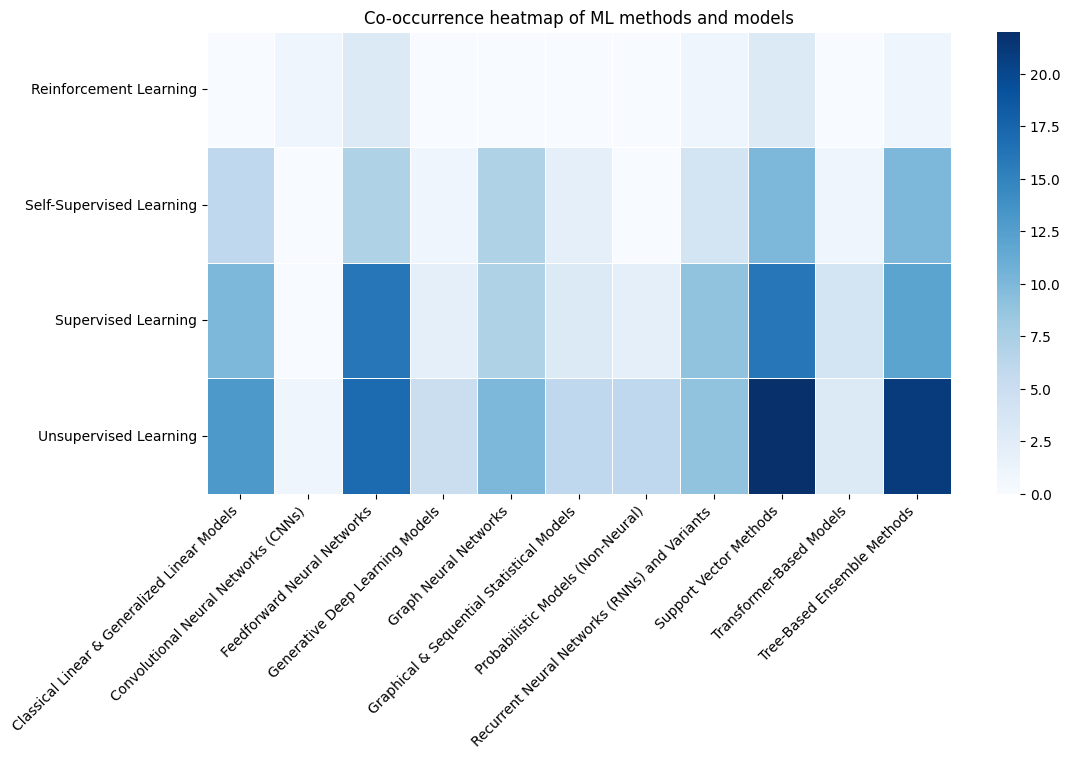

In [112]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the heatmap with rotated x-axis labels
sns.heatmap(co_occurrence_matrix_method_model, annot=False, cmap='Blues', fmt='d', linewidths=.5)

# Set labels and title
#plt.xlabel("Model")
#plt.ylabel("Method")
plt.xlabel('')
plt.ylabel('')
plt.title('Co-occurrence heatmap of ML methods and models')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=45, ha='right', fontsize=10)

#plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)

# Saving the figure.
plt.savefig(f'{IMAGE_FOLDER}co-occurrence_heatmap_ml_methods_and_models.png', transparent=True, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [113]:
# Identify low-occurrence areas in the co-occurrence matrix
threshold = co_occurrence_matrix_method_model.mean().mean()  # Define a threshold based on the average count
low_occurrence = co_occurrence_matrix_method_model < threshold  # Boolean mask for low occurrences

# Extract low-occurrence pairs
gap_analysis_df = co_occurrence_matrix_method_model[low_occurrence]

In [114]:
gap_analysis_df

ml_model_category,Classical Linear & Generalized Linear Models,Convolutional Neural Networks (CNNs),Feedforward Neural Networks,Generative Deep Learning Models,Graph Neural Networks,Graphical & Sequential Statistical Models,Probabilistic Models (Non-Neural),Recurrent Neural Networks (RNNs) and Variants,Support Vector Methods,Transformer-Based Models,Tree-Based Ensemble Methods
ml_method_category,,,,,,,,,,,
Reinforcement Learning,0.0,1,3.0,0,0.0,0.0,0.0,1.0,3.0,0,1.0
Self-Supervised Learning,NaN,0,NaN,1,NaN,2.0,0.0,4.0,NaN,1,NaN
Supervised Learning,NaN,0,NaN,2,NaN,3.0,2.0,NaN,NaN,4,NaN
Unsupervised Learning,NaN,1,NaN,5,NaN,NaN,NaN,NaN,NaN,3,NaN
